In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

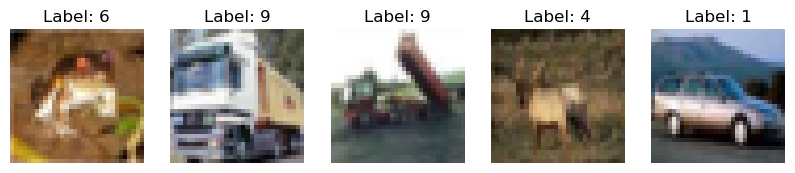

In [9]:
# Display 5 sample images along with their corresponding labels after loading.

fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Label: {y_train[i][0]}")
    axes[i].axis('off')
plt.show()

In [10]:
# Print the shape of the dataset and the count of unique labels.

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Unique labels:", np.unique(y_train))

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


In [11]:
#Normalize the image pixel values to the range [0, 1]

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
# Task 2: Build and Train CNN Model

# Data Augmentation(Helps the model perform well on unseen images)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

#Design a simple CNN model

def create_model():
    model = Sequential([
        Input(shape=(32,32,3)),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.2),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.3),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Dropout(0.4),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

model = create_model()
# Compile the model using appropriate loss and optimizer
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
#Train the model on the training set for 10–30 epochs.

history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 81ms/step - accuracy: 0.2490 - loss: 2.2845 - val_accuracy: 0.3892 - val_loss: 2.1011
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.4173 - loss: 1.6066 - val_accuracy: 0.4949 - val_loss: 1.5340
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.4667 - loss: 1.4810 - val_accuracy: 0.4797 - val_loss: 1.6840
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.5101 - loss: 1.3672 - val_accuracy: 0.5449 - val_loss: 1.3989
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.5367 - loss: 1.2964 - val_accuracy: 0.5631 - val_loss: 1.3249
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5603 - loss: 1.2282 - val_accuracy: 0.6646 - val_loss: 0.9296
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5802 - loss: 1.1813 - val_accuracy: 0.6061 - val_loss: 1.1382
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.6001 - loss: 1.1318 - 

In [18]:
#Train the model on the training set for 10–20 epochs.

history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20, validation_data=(x_test, y_test))


Epoch 1/20


C:\Users\Vinay Uppada\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.7162 - loss: 0.8241 - val_accuracy: 0.7453 - val_loss: 0.7377
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.7198 - loss: 0.8171 - val_accuracy: 0.7758 - val_loss: 0.6571
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.7222 - loss: 0.8064 - val_accuracy: 0.7752 - val_loss: 0.6582
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.7236 - loss: 0.7962 - val_accuracy: 0.7892 - val_loss: 0.6051
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.7229 - loss: 0.7955 - val_accuracy: 0.7443 - val_loss: 0.7705
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.7235 - loss: 0.7931 - val_accuracy: 0.7805 - val_loss: 0.6469
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.7249 - loss: 0.7954 - val_accuracy: 0.7105 - val_loss: 0.8893
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.7239 - loss: 0.7957 - val_accurac

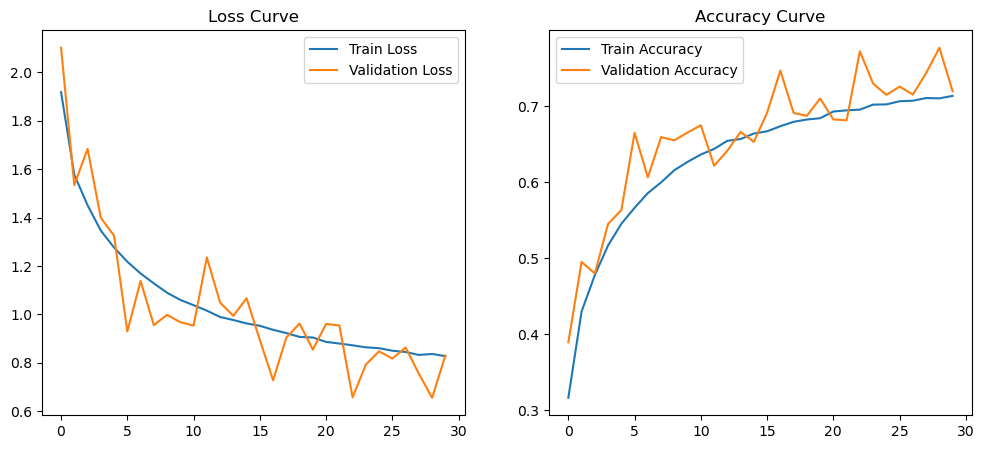

In [14]:
#Plot the training and validation loss and accuracy curves.

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

In [15]:
# Task 3: Evaluate Model
#Evaluate the model on the test set and calculate accuracy

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7187 - loss: 0.8241
Test Accuracy: 0.72


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


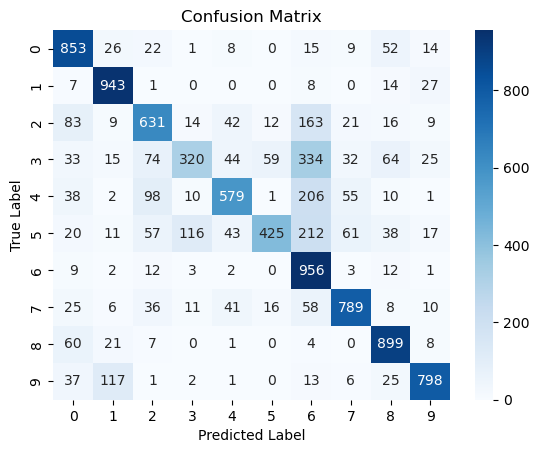

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79      1000
           1       0.82      0.94      0.88      1000
           2       0.67      0.63      0.65      1000
           3       0.67      0.32      0.43      1000
           4       0.76      0.58      0.66      1000
           5       0.83      0.42      0.56      1000
           6       0.49      0.96      0.64      1000
           7       0.81      0.79      0.80      1000
           8       0.79      0.90      0.84      1000
           9       0.88      0.80      0.84      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.71     10000
weighted avg       0.74      0.72      0.71     10000



In [16]:
#Generate a confusion matrix and classification report.

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred))


In [17]:

# Task 4: Experiment with Model Improvements
#  Experiment with different optimizer

model_sgd = create_model()
model_sgd.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), batch_size=64)
loss_sgd, accuracy_sgd = model_sgd.evaluate(x_test, y_test)

# Performance Comparison
print("Performance Comparison")
print(f"Original Model Accuracy: {accuracy:.2f}")
print(f"SGD Model Accuracy: {accuracy_sgd:.2f}")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.2361 - loss: 2.3937 - val_accuracy: 0.3324 - val_loss: 2.0822
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.3789 - loss: 1.6798 - val_accuracy: 0.3252 - val_loss: 2.0413
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.4316 - loss: 1.5444 - val_accuracy: 0.4613 - val_loss: 1.5221
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.4649 - loss: 1.4780 - val_accuracy: 0.5078 - val_loss: 1.4305
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 61ms/step - accuracy: 0.4839 - loss: 1.4156 - val_accuracy: 0.5376 - val_loss: 1.3153
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 62ms/step - accuracy: 0.5096 - loss: 1.3571 - val_accuracy: 0.5213 - val_loss: 1.4084
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5326 - loss: 1.2946 - val_accuracy: 0.5671 - val_loss: 1.2186
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 57ms/step - accuracy: 0.5432 - loss: 1.2550 - 